In [1]:
import cv2
import numpy as np
import face_recognition
import os
from datetime import datetime
from matplotlib import pyplot as plt

[['THUHOA', '68'], ['THANHTHUY', '69']]
Diem_Danh/2023-06-28_13:57:28.jpg


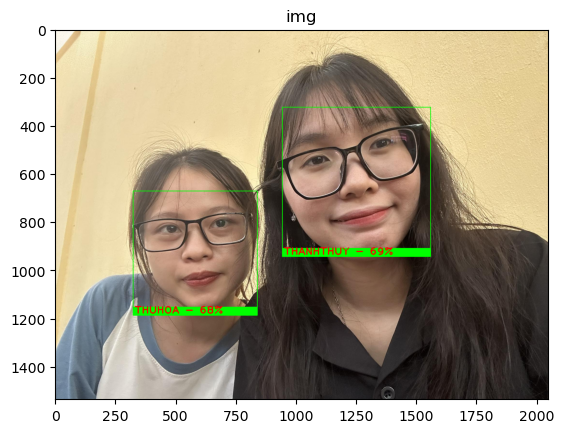

In [13]:
path = 'Images_Excel'
images = []
classNames = []
myList = os.listdir(path)

for cl in myList:
    curImg = cv2.imread(f'{path}/{cl}')
    images.append(curImg)
    classNames.append(os.path.splitext(cl)[0])
    
def findEncodings(images):
    encodeList = []
    for img in images:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        encode = face_recognition.face_encodings(img)[0]
        encodeList.append(encode)
    return encodeList
   
def Attendance(name,valmin):
    with open('Diem_danh.csv','r+') as f:
        myDataList = f.readlines()
        nameList = []
        for line in myDataList:
            entry = line.split(',')
            nameList.append(entry[0])
        #if name not in nameList:
        now = datetime.now()
        dtString = now.strftime('%d/%m/%Y, %H:%M:%S')
        f.writelines(f'\n{name},{dtString},{valmin}')
   
encodeListKnown = findEncodings(images)

img = cv2.imread('test.jpg',cv2.COLOR_BGR2GRAY)

imgS = cv2.resize(img,(0,0),None,0.25,0.25)
imgS = cv2.cvtColor(imgS, cv2.COLOR_BGR2RGB)

test = []

facesCurFrame = face_recognition.face_locations(imgS)
encodesCurFrame = face_recognition.face_encodings(imgS,facesCurFrame)
# so sánh và ghi nhận ID
for encodeFace,faceLoc in zip(encodesCurFrame,facesCurFrame):
    matches = face_recognition.compare_faces(encodeListKnown,encodeFace)
    faceDis = face_recognition.face_distance(encodeListKnown,encodeFace)
    #print(faceDis)
    matchIndex = np.argmin(faceDis) # get index of min value is true

    # vẽ khung và hiển thị tên
    if matches[matchIndex]:
        name = classNames[matchIndex].upper()
        valmin = "{}".format(round(100*(1-faceDis[matchIndex])))
        #print(valmin)
        y1,x2,y2,x1 = faceLoc
        y1, x2, y2, x1 = y1*4,x2*4,y2*4,x1*4
        cv2.rectangle(img,(x1,y1),(x2,y2),(0,255,0),2)
        cv2.rectangle(img,(x1,y2-35),(x2,y2),(0,255,0),cv2.FILLED)
        cv2.putText(img,name + ' - ' + valmin +'%',(x1+6,y2-6),cv2.FONT_HERSHEY_PLAIN,3,(0,0,255),4)
        Attendance(name,valmin)
        test.append([name,valmin])
# camera
print(test)
now = datetime.now()
cv2.imwrite("Diem_Danh/" + str(now).replace(" ", "_").replace(":", "-").split(".")[0] + ".jpg", img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("img")
plt.show()

In [ ]:
path = 'Images_Excel'
images = []
classNames = []
myList = os.listdir(path)
print(myList)
for cl in myList:
    curImg = cv2.imread(f'{path}/{cl}')
    images.append(curImg)
    classNames.append(os.path.splitext(cl)[0])
print(classNames)
   
def findEncodings(images):
    encodeList = []
    for img in images:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        encode = face_recognition.face_encodings(img)[0]
        encodeList.append(encode)
    return encodeList
   
def Attendance(name,valmin):
    with open('Diem_danh.csv','r+') as f:
        myDataList = f.readlines()
        nameList = []
        for line in myDataList:
            entry = line.split(',')
            nameList.append(entry[0])
        #if name not in nameList:
        now = datetime.now()
        dtString = now.strftime('%d/%m/%Y, %H:%M:%S')
        f.writelines(f'\n{name},{dtString},{valmin}')
   
encodeListKnown = findEncodings(images)
print('Endcoding OK. Loading camera...')
   
cap = cv2.VideoCapture(0)
   
while True:
    success, img = cap.read()
    #img = captureScreen()
    imgS = cv2.resize(img,(0,0),None,0.25,0.25)
    imgS = cv2.cvtColor(imgS, cv2.COLOR_BGR2RGB)
   
    facesCurFrame = face_recognition.face_locations(imgS)
    encodesCurFrame = face_recognition.face_encodings(imgS,facesCurFrame)
    # so sánh và ghi nhận ID
    for encodeFace,faceLoc in zip(encodesCurFrame,facesCurFrame):
        matches = face_recognition.compare_faces(encodeListKnown,encodeFace)
        faceDis = face_recognition.face_distance(encodeListKnown,encodeFace)
        #print(faceDis)
        matchIndex = np.argmin(faceDis) # get index of min value is true
  
        # vẽ khung và hiển thị tên
        if matches[matchIndex]:
            name = classNames[matchIndex].upper()
            valmin = "{}".format(round(100*(1-faceDis[matchIndex])))
            #print(valmin)
            y1,x2,y2,x1 = faceLoc
            y1, x2, y2, x1 = y1*4,x2*4,y2*4,x1*4
            cv2.rectangle(img,(x1,y1),(x2,y2),(0,255,0),2)
            cv2.rectangle(img,(x1,y2-35),(x2,y2),(0,255,0),cv2.FILLED)
            cv2.putText(img,name + ' - ' + valmin +'%',(x1+6,y2-6),cv2.FONT_HERSHEY_PLAIN,1,(255,255,255),2)
            Attendance(name,valmin)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    # camera
    cv2.imshow('Camera 01',img)
    cv2.waitKey(1)

['minhduc.jpg', 'thanhthuy.jpg', 'thuhoa.jpg']
['minhduc', 'thanhthuy', 'thuhoa']
Endcoding OK. Loading camera...
